In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn import metrics

In [3]:
df = pd.read_csv('C:\\Users\\oscar\\PycharmProjects\\if29project\\data\\finalDF')

NameError: name 'pd' is not defined

In [3]:
#On centre réduit les données
s_sc = StandardScaler()
df_processed = s_sc.fit_transform(df)


In [4]:
#On réalise l'ACP
modelPCA = PCA(n_components=2)
df_reduced = modelPCA.fit_transform(df_processed)

In [5]:
#KMeans
modelKMeans = KMeans(n_clusters=6)
df_KMeans = modelKMeans.fit(df_reduced)

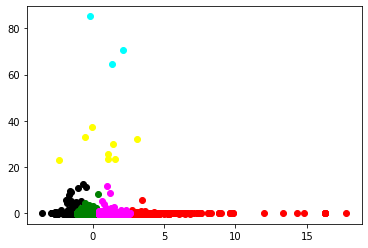

In [6]:
label = modelKMeans.fit_predict(df_reduced)

filtered_label0 = df_reduced[label == 0]
filtered_label1 = df_reduced[label == 1]
filtered_label2 = df_reduced[label == 2]
filtered_label3 = df_reduced[label == 3]
filtered_label4 = df_reduced[label == 4]
filtered_label5 = df_reduced[label == 5]

plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'cyan')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'magenta')
plt.scatter(filtered_label5[:,0] , filtered_label5[:,1] , color = 'yellow')
plt.show()

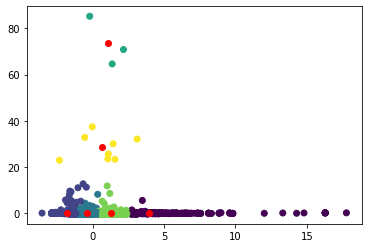

In [7]:
plt.scatter(df_reduced[:,0], df_reduced[:,1], c=df_KMeans.labels_)
plt.scatter(modelKMeans.cluster_centers_[:,0], modelKMeans.cluster_centers_[:,1], c='r')
plt.show()

In [16]:
#User from each clusters

cluster0 = pd.DataFrame(df_reduced[df_KMeans.labels_==0])
cluster1 = pd.DataFrame(df_reduced[df_KMeans.labels_==1])
cluster2 = pd.DataFrame(df_reduced[df_KMeans.labels_==2])
cluster3 = pd.DataFrame(df_reduced[df_KMeans.labels_==3])
cluster4 = pd.DataFrame(df_reduced[df_KMeans.labels_==4])
cluster5 = pd.DataFrame(df_reduced[df_KMeans.labels_==5])

cluster0['suspect'] = 0
cluster1['suspect'] = 1
cluster2['suspect'] = 0
cluster3['suspect'] = 0
cluster4['suspect'] = 0
cluster5['suspect'] = 0

In [17]:
dataset_label = pd.concat([cluster0, cluster1, cluster2, cluster3, cluster4, cluster5])
dataset_label.to_csv('data/dataset_label.csv', encoding='utf-8')
dataset_final = np.array(dataset_label)


In [18]:
X = dataset_final[:,:-1]
Y = dataset_final[:,-1]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state = 0)

In [20]:
linear = svm.SVC(kernel='poly')

linear.fit(X_train, Y_train)

Y_pred = linear.predict(X_test)


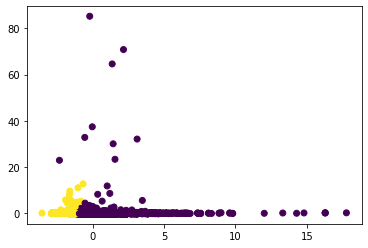

In [23]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train)
plt.show()

In [21]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9984481688392303


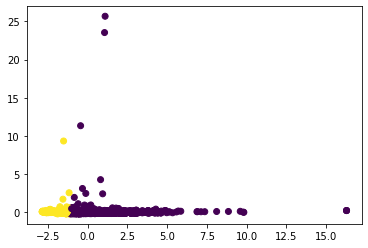

In [22]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_pred)
plt.show()